# Decision Tree Classification

## Importing libraries

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [138]:
data = pd.read_csv('hmeq.csv')
data = data.drop(['VALUE','REASON','JOB','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC'], axis = 1)
data

,BAD,LOAN,MORTDUE
0,1,1100,25860.0
1,1,1300,70053.0
2,1,1500,13500.0
3,1,1500,NaN
4,0,1700,97800.0
...,...,...,...
5955,0,88900,57264.0
5956,0,89000,54576.0
5957,0,89200,54045.0
5958,0,89800,50370.0


In [139]:
data.dropna(inplace=True)
data

,BAD,LOAN,MORTDUE
0,1,1100,25860.0
1,1,1300,70053.0
2,1,1500,13500.0
4,0,1700,97800.0
5,1,1700,30548.0
...,...,...,...
5955,0,88900,57264.0
5956,0,89000,54576.0
5957,0,89200,54045.0
5958,0,89800,50370.0


In [140]:
features = data.drop(['BAD'], axis = 1).values
features
labels = data.BAD

tree_clf = DecisionTreeClassifier(max_depth = 3)
tree_clf.fit(features,labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

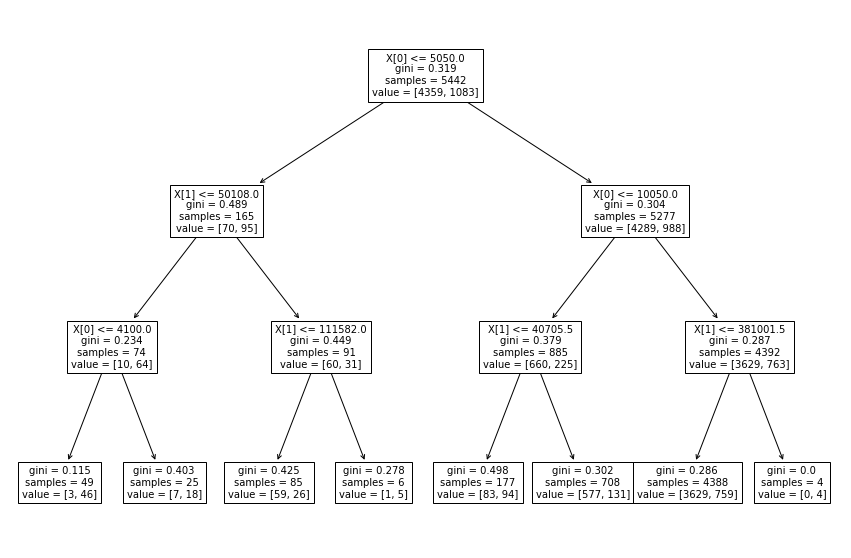

In [141]:
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clf, fontsize = 10)
plt.show()

In [142]:
ypred = tree_clf.predict(features)
ypred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [143]:
cm = confusion_matrix(labels, ypred)
print(cm)
accuracy_score(labels, ypred)

[[4265   94]
 [ 916  167]]


0.8144064682102168

### We get a fairly decent accuracy score of .8144% for our decision tree. 